In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
data = pd.read_csv('/Users/marcus/Documents/Projects/Ironhack/data_1.05_activities/files_for_activities/csv_files/merged_clean_ver2.csv')

# Lesson 3

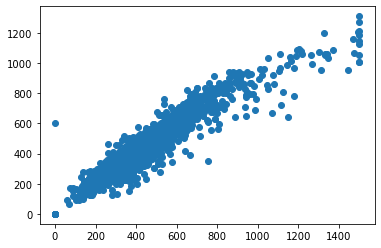

In [6]:
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

In [ ]:
## Numerical Variables 

In [7]:
import scipy.stats as stats

In [8]:
x=data['ic2']
y=data['ic3']
stats.pearsonr(x, y) # gives correlation coefficient and the p value 

(0.9535853403294168, 0.0)

In [9]:
x.corr(y) # this is the pandas implementation of the correlation coefficient 

0.9535853403294169

In [10]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9510617375454639, pvalue=0.0)

In [11]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.8254641303546064, pvalue=0.0)

# Lesson 4

In [12]:
corr_data = data.drop(['id','state', 'gender'], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix

,Unnamed: 0,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
Unnamed: 0,1.000000,-0.007035,0.001056,-0.000033,0.007066,0.004945,-0.007032,-0.006405,-0.002043
median_home_val,-0.007035,1.000000,0.707209,0.743318,0.734526,0.748761,0.745223,0.138966,0.116805
median_household_income,0.001056,0.707209,1.000000,0.951409,0.974777,0.928980,0.805221,0.120445,0.113246
ic2,-0.000033,0.743318,0.951409,1.000000,0.953585,0.971498,0.874783,0.136096,0.129964
ic3,0.007066,0.734526,0.974777,0.953585,1.000000,0.971909,0.827514,0.125438,0.121965
ic4,0.004945,0.748761,0.928980,0.971498,0.971909,1.000000,0.868411,0.132438,0.131260
ic5,-0.007032,0.745223,0.805221,0.874783,0.827514,0.868411,1.000000,0.141580,0.137878
avggift,-0.006405,0.138966,0.120445,0.136096,0.125438,0.132438,0.141580,1.000000,0.487595
target_d,-0.002043,0.116805,0.113246,0.129964,0.121965,0.131260,0.137878,0.487595,1.000000


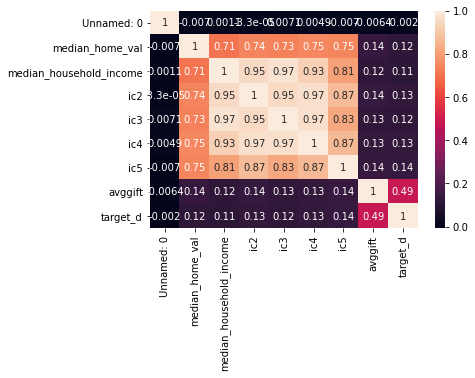

In [13]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
# Categorical variables - Chi square test for independence

In [ ]:
crosstab = pd.crosstab(data['state'], data['gender'])  # note we need to clean column state before we use this 
# crosstab

In [ ]:
[statistic, p_value, dof, arr] = stats.chi2_contingency(crosstab)
print(p_value)

# first value is the chi-sq test static, the second value is the p-value, 
# and the third number is the degrees of freedom
# An array is also returned which contains the expected cell counts

In [ ]:
# in this case they are independent of each other 

In [ ]:
# To check correlation between numerical and categorical variables, we use One Way Anova Test
# which we will cover later 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = reg_data['TARGET_D']
X = reg_data.drop(['TARGET_D'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

In [ ]:
r2_score(Y, predictions)

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
predictions  = lm.predict(X)

In [ ]:
mse = mean_squared_error(Y, predictions)
print(mse)

In [ ]:
# discuss in more details about the intercept, coefficients, OLS etc in the next section